# **ES 114 Probability Lab Assignment-7**

Name- Shardul Rakesh Junagade

Roll No- 23110297

# **Two Discrete Random Variables**

In this assignment, I have implemented a Python program to analyze the Joint Probability Mass Function (PMF) of two random variables (X, Y). The tasks performed in this notebook are as follows:

1. Determined if the given Joint PMF corresponds to independent or dependent random variables.
2. Plotted the Joint PMF and Joint CDF.
3. Derived and plotted the Marginal PMFs and Marginal CDFs.
4. Computed the expected value of $E[XY]$ and the covariance, $Cov(X, Y) = E[(X - E[X])(Y - E[Y])]$.

### **Formulas**
- Expected value of $XY$:  
  $$
  E[XY] = \sum_{x} \sum_{y} x \cdot y \cdot P(X = x, Y = y)
  $$

- Covariance of $X$ and $Y$:  
  $$
  Cov(X, Y) = E[(X - E[X])(Y - E[Y])]
  $$  
  This can also be expressed as:  
  $$
  Cov(X, Y) = E[XY] - E[X] \cdot E[Y]
  $$



## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from IPython.display import Javascript

## Helper Functions

In [2]:
# Function to input the values of X and Y and return the joint PMF
def input_joint_pmf():
  x_values = list(map(int, input("Enter the values of X separated by space: ").split()))
  y_values = list(map(int, input("Enter the values of Y separated by space: ").split()))
  joint_pmf=[]
  for i in range(len(x_values)):
    row=[]
    for j in range(len(y_values)):
      prob=float(input(f"Enter Joint PMF value for X={x_values[i]} and Y={y_values[j]}: "))
      row.append(prob)
    joint_pmf.append(row)
  joint_pmf=np.array(joint_pmf)
  return joint_pmf


# Function to print the joint PMF/CDF table
def print_table(distribution, x_values, y_values):
  print("    ", end="")
  for y in y_values:
      print(f"{y:>10}", end="")
  print()
  for i, row in enumerate(distribution):
      print(f"{x_values[i]:<4}", end="")
      for prob in row:
          print(f"{prob:>10.4f}", end="")
      print()
  print()
 
     
# Function to plot 3D bar graph of joint PMF and CDF
def plot_joint_pmf_cdf_3D(joint_pmf, joint_cdf, x_values, y_values):
  fig = plt.figure(figsize=(10, 5))
  ax1 = fig.add_subplot(121, projection='3d')
  ax2 = fig.add_subplot(122, projection='3d')
  _xx, _yy = np.meshgrid(x_values,y_values)
  x, y = _xx.ravel(), _yy.ravel()
  width = depth = 1
  ax1.bar3d(x, y, np.zeros_like(joint_pmf).flatten(), width, depth, joint_pmf.flatten(), shade=True)
  ax1.set_title('Joint PMF')
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.grid(visible=True, color='grey', linestyle='--')
  ax1.set_xticks(x_values)
  ax1.set_yticks(y_values)

  ax2.bar3d(x, y, np.zeros_like(joint_cdf).flatten(), width, depth, joint_cdf.flatten(), shade=True)
  ax2.set_title('Joint CDF')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.grid(visible=True, color='grey', linestyle='--')
  ax2.set_xticks(x_values)
  ax2.set_yticks(y_values)
  plt.tight_layout()
  plt.show()
  

# Function to plot marginal PMFs and CDFs
def plot_marginals(joint_pmf, x_values, y_values):
  # Marginal PMFs
  x_marginal_pmf = np.sum(joint_pmf, axis=0)
  y_marginal_pmf = np.sum(joint_pmf, axis=1)
  print("Marginal PMF for X:", x_marginal_pmf, "\nMarginal PMF for Y:", y_marginal_pmf)
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.bar(x_values, x_marginal_pmf, width=0.5)
  plt.title("Marginal PMF for X")
  plt.xlabel("X")
  plt.ylabel("Probability")
  plt.xticks(x_values)
  
  plt.subplot(1, 2, 2)
  plt.bar(y_values, y_marginal_pmf, width=0.5)
  plt.title("Marginal PMF for Y")
  plt.xlabel("Y")
  plt.ylabel("Probability")
  plt.xticks(y_values)
  plt.tight_layout()
  plt.show()

  # Marginal CDFs
  x_marginal_cdf = np.cumsum(x_marginal_pmf)
  y_marginal_cdf = np.cumsum(y_marginal_pmf)
  print("Marginal CDF for X:", x_marginal_cdf, "\nMarginal CDF for Y:", y_marginal_cdf)
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.bar(x_values, x_marginal_cdf, width=0.5)
  plt.title("Marginal CDF for X")
  plt.xlabel("X")
  plt.ylabel("CDF")
  plt.xticks(x_values)
  
  plt.subplot(1, 2, 2)
  plt.bar(y_values, y_marginal_cdf, width=0.5)
  plt.title("Marginal CDF for Y")
  plt.xlabel("Y")
  plt.ylabel("CDF")
  plt.xticks(y_values)
  plt.tight_layout()
  plt.show()


### **Calculating Joint CDF**

To calculate the joint CDF, we can use the following relation:

$$F_{XY}(x, y) = P(X \leq x, Y \leq y) = \sum_{x' \leq x} \sum_{y' \leq y} p_{XY}(x', y')$$

In [3]:
# Function to calculate Joint CDF
def calculate_joint_cdf(joint_pmf):
  joint_cdf=np.zeros_like(joint_pmf)
  for i in range(joint_pmf.shape[0]):
    for j in range(joint_pmf.shape[1]):
      if j==0:
          joint_cdf[i][j]=joint_pmf[i][j]
      else:
          joint_cdf[i][j]=joint_cdf[i][j-1]+joint_pmf[i][j]
  for j in range(joint_pmf.shape[1]):
    for i in range(1, joint_pmf.shape[0]):
      joint_cdf[i][j]+=joint_cdf[i-1][j]
  return joint_cdf

### **Calculating Marginal PMFs and CDFs**

To calculate the marginal PMFs, we can use the following relation:

$$p_X(x) = \sum_y \ p_{XY}(x, y)$$

$$p_Y(y) = \sum_x \ p_{XY}(x, y)$$

To calculate the marginal CDFs, we can use the following relation:

$$F_X(x) = \sum_{x' \leq x} \ p_X(x')$$

$$F_Y(y) = \sum_{y' \leq y} \ p_Y(y')$$

In [4]:
# Function to calculate marginal PMFs
def marginal_pmf(joint_pmf):
  x_marginal_pmf = np.sum(joint_pmf, axis=0)
  y_marginal_pmf = np.sum(joint_pmf, axis=1)
  return x_marginal_pmf, y_marginal_pmf

# Function to calculate marginal CDFs
def marginal_cdf(joint_pmf):
    x_marginal_pmf, y_marginal_pmf = marginal_pmf(joint_pmf)
    x_marginal_cdf = np.cumsum(x_marginal_pmf)
    y_marginal_cdf = np.cumsum(y_marginal_pmf)
    return x_marginal_cdf, y_marginal_cdf

### **Checking if a Given Joint PMF Represents Independent Variables**

Two random variables $X$ and $Y$ are independent if their joint PMF satisfies the following condition:

$$
P_{XY}(x, y) = P(X = x \cap Y = y) = P_X(x) \cdot P_Y(y), \ \forall  x, y
$$

To verify independence, we can compute the marginal PMFs $P_X(x)$ and $P_Y(y)$ from the joint PMF and check whether the above equality holds for all combinations of $x$ and $y$. If it does, the variables $X$ and $Y$ are independent; otherwise, they are dependent.


In [5]:
# Function to check if the given joint PMF is independent
def is_independent_joint_pmf(joint_pmf):
  marginal_x, marginal_y = marginal_pmf(joint_pmf)
  for i in range(len(marginal_x)):
    for j in range(len(marginal_y)):
      if joint_pmf[i][j]!=marginal_x[i]*marginal_y[j]:
        return False
  return True

### **Calculating Expectation and Covariance of a Joint PMF**

In this section, I define functions to compute the **expectation** and **covariance** for two random variables $X$ and $Y$ based on their joint PMF. These statistical measures provide insights into the relationship between the variables.

#### **Expectation:**
The expectation $E[XY]$ is given by:  
$$
E[XY] = \sum_x \sum_y x \cdot y \cdot P_{XY}(x, y)
$$  

#### **Covariance of $X$ and $Y$:**
The covariance quantifies the linear relationship between $X$ and $Y$ and is defined as:  
$$
Cov(X, Y) = E[(X - E[X])(Y - E[Y])]
$$  
This formula can be simplified as:  
$$
Cov(X, Y) = E[XY] - E[X] \cdot E[Y]
$$ 

In [6]:
# Function to calculate expectations
def calculate_expections(joint_pmf, x_values, y_values):
	x_marginal, y_marginal = marginal_pmf(joint_pmf)
	expected_x=np.dot(x_values, x_marginal)
	expected_y=np.dot(y_values, y_marginal)
	expected_xy=0
	for i in range(len(x_values)):
		for j in range(len(y_values)):
			expected_xy+=x_values[i]*y_values[j]*joint_pmf[i][j]
	return expected_xy, expected_x, expected_y
  

# Function to calculate covariance of a joint PMF
def calculate_covariance(joint_pmf, x_values, y_values):
	expected_xy, expected_x, expected_y=calculate_expections(joint_pmf, x_values, y_values)
	covariance=expected_xy-expected_x*expected_y
	return covariance

## **Function to Describe a Joint PMF**

The `describe_joint_pmf` function provides a comprehensive analysis of a given joint probability mass function (PMF) for two random variables $ X $ and $ Y $. It performs several tasks to describe the characteristics of the joint distribution, including:

1. **Independence Check**: It checks if the joint PMF corresponds to independent random variables.
2. **Expected Values**: It calculates and prints the expected values for $ X $, $ Y $, and $ XY $.
3. **Covariance**: It calculates and prints the covariance between $ X $ and $ Y $.
4. **PMF and CDF Tables**: It prints the Joint PMF and Joint CDF tables.
5. **Marginal PMF and CDF**: It prints the marginal PMFs and CDFs for both $ X $ and $ Y $.
6. **Visualizations**:
   - Generates 3D plots for both the Joint PMF and Joint CDF.
   - Plots the marginal PMF and CDF for both $ X $ and $ Y $.


In [7]:
def describe_joint_pmf(joint_pmf,x_values,y_values):
	print("Joint PMF Table")
	print_table(joint_pmf, x_values, y_values)

	joint_cdf=calculate_joint_cdf(joint_pmf)
	print("Joint CDF Table")
	print_table(joint_cdf, x_values, y_values)

	if is_independent_joint_pmf(joint_pmf):
		print('The given Joint PMF corresponds to independent random variables (X, Y).')
	else:
		print('The given Joint PMF does not correspond to independent random variables (X, Y).')

	expected_xy, expected_x, expected_y = calculate_expections(joint_pmf, x_values, y_values)
	covariance = calculate_covariance(joint_pmf, x_values, y_values)
	print("Expected Value of X: ", expected_x)
	print("Expected Value of Y: ", expected_y)
	print("Expected Value of XY: ", expected_xy)
	print("Covariance of X and Y: ", covariance)

	plot_joint_pmf_cdf_3D(joint_pmf,joint_cdf,x_values,y_values)

	plot_marginals(joint_pmf,x_values,y_values)

## Joint PMF of Independent Random Variables

<IPython.core.display.Javascript object>

Joint PMF Table
             1         2         3
1       0.1111    0.1111    0.1111
2       0.1111    0.1111    0.1111
3       0.1111    0.1111    0.1111

Joint CDF Table
             1         2         3
1       0.1111    0.2222    0.3333
2       0.2222    0.4444    0.6667
3       0.3333    0.6667    1.0000

The given Joint PMF corresponds to independent random variables (X, Y).
Expected Value of X:  2.0
Expected Value of Y:  2.0
Expected Value of XY:  4.0
Covariance of X and Y:  0.0


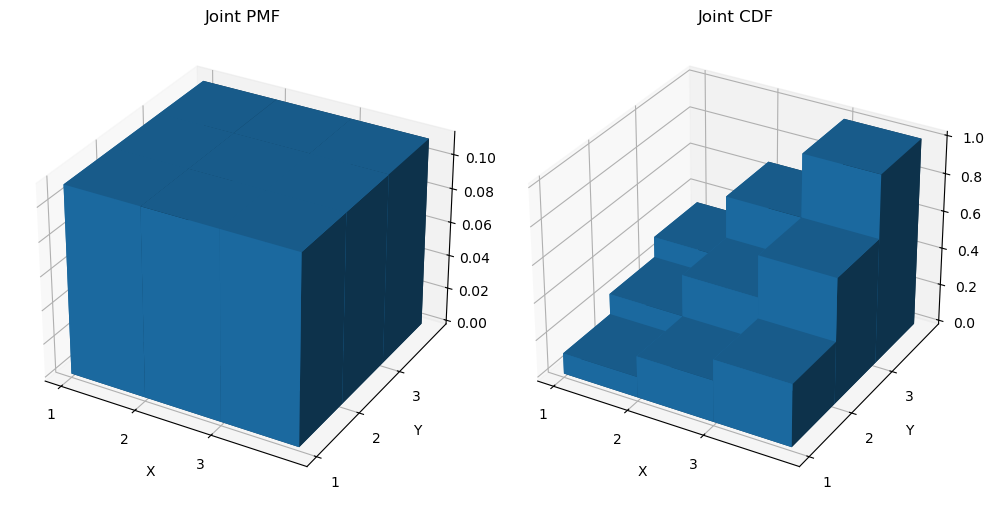

Marginal PMF for X: [0.33333333 0.33333333 0.33333333] 
Marginal PMF for Y: [0.33333333 0.33333333 0.33333333]


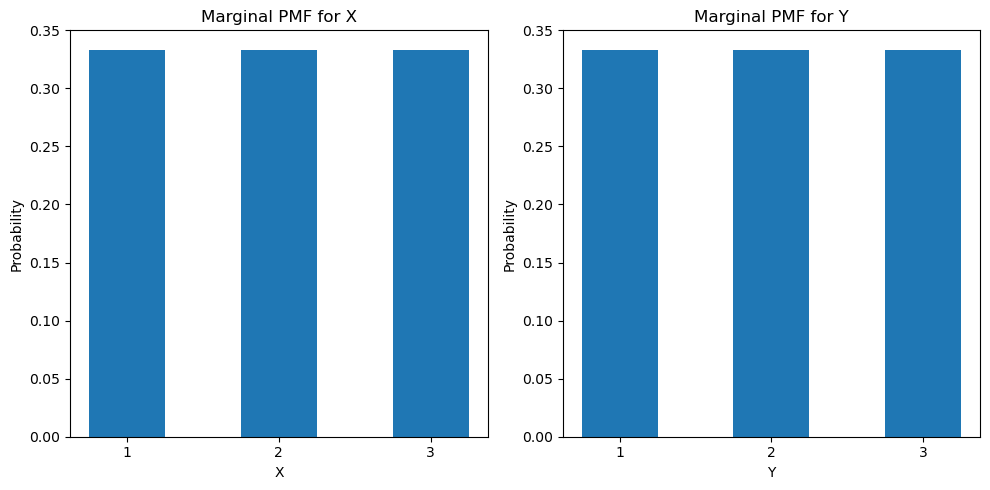

Marginal CDF for X: [0.33333333 0.66666667 1.        ] 
Marginal CDF for Y: [0.33333333 0.66666667 1.        ]


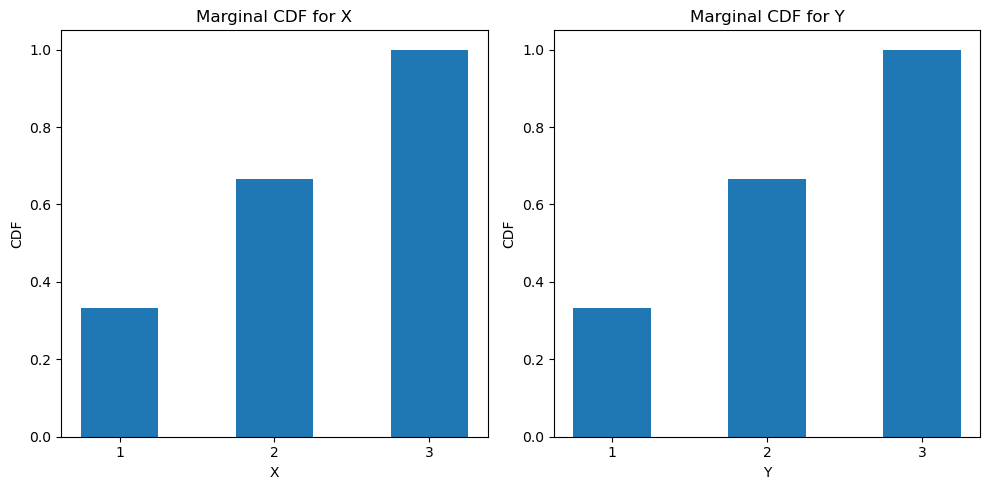

In [8]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# Joint PMF with independent random variables
x_values1 = [1, 2, 3]
y_values1 = [1, 2, 3]
joint_pmf1 = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
describe_joint_pmf(joint_pmf1, x_values1, y_values1)

## Joint PMF of Dependent Random Variables

<IPython.core.display.Javascript object>

Joint PMF Table
             2         4         6         8
1       0.1250    0.0625    0.0000    0.0000
3       0.0000    0.1250    0.1250    0.0000
5       0.0625    0.0625    0.0625    0.1250
7       0.0625    0.0625    0.0000    0.1250

Joint CDF Table
             2         4         6         8
1       0.1250    0.1875    0.1875    0.1875
3       0.1250    0.3125    0.4375    0.4375
5       0.1875    0.4375    0.6250    0.7500
7       0.2500    0.5625    0.7500    1.0000

The given Joint PMF does not correspond to independent random variables (X, Y).
Expected Value of X:  3.875
Expected Value of Y:  5.25
Expected Value of XY:  22.625
Covariance of X and Y:  2.28125


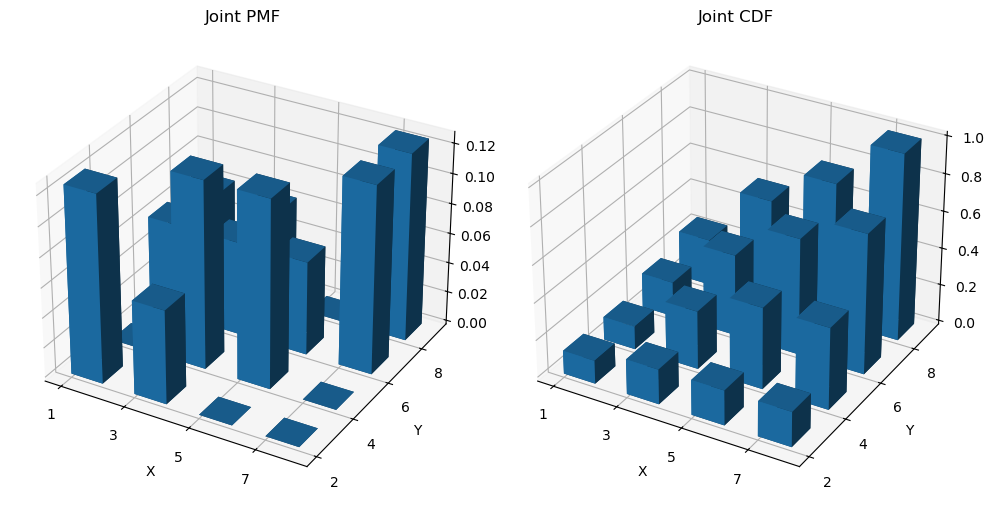

Marginal PMF for X: [0.25   0.3125 0.1875 0.25  ] 
Marginal PMF for Y: [0.1875 0.25   0.3125 0.25  ]


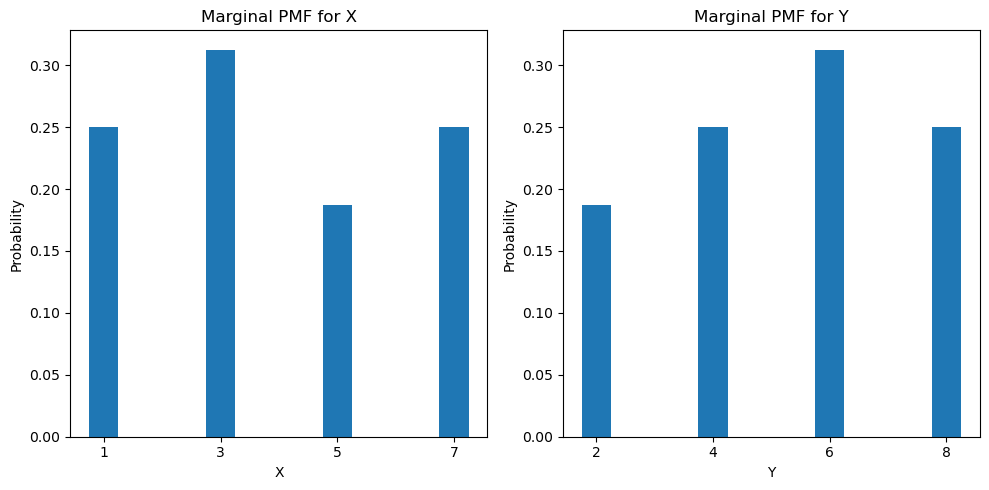

Marginal CDF for X: [0.25   0.5625 0.75   1.    ] 
Marginal CDF for Y: [0.1875 0.4375 0.75   1.    ]


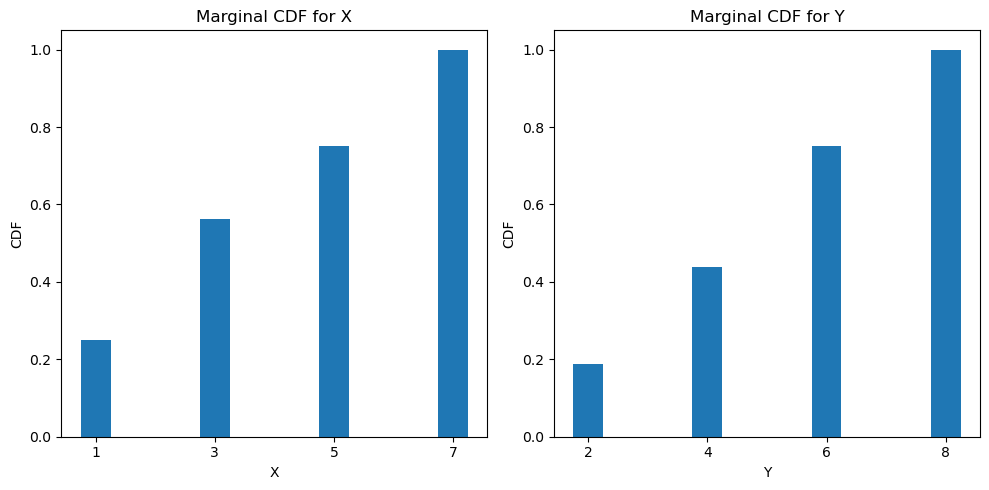

In [9]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# Joint PMF with dependent random variables
x_values2 = [1, 3, 5, 7]
y_values2 = [2, 4, 6, 8]
joint_pmf2 = np.array([[0.125, 0.0625, 0, 0], [0, 0.125, 0.125, 0], [0.0625, 0.0625, 0.0625, 0.125], [0.0625, 0.0625, 0, 0.125]])
describe_joint_pmf(joint_pmf2, x_values2, y_values2)

## Function to plot Joint CDF using plot_surface

In [10]:
def plot_joint_cdf_surface(joint_pmf, x_values, y_values, title=''):
	joint_cdf_values = calculate_joint_cdf(joint_pmf)
	X, Y = np.meshgrid(x_values, y_values)
	fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
	surf = ax.plot_surface(X, Y, joint_cdf_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)
	# Customize the z axis.
	ax.set_zlim(0, 1)  # CDF values range from 0 to 1
	ax.zaxis.set_major_locator(LinearLocator(10))
	ax.zaxis.set_major_formatter('{x:.02f}')
	fig.colorbar(surf, shrink=0.5, aspect=5)
	plt.title(title)
	plt.xlabel('X')
	plt.ylabel('Y')
	plt.show()



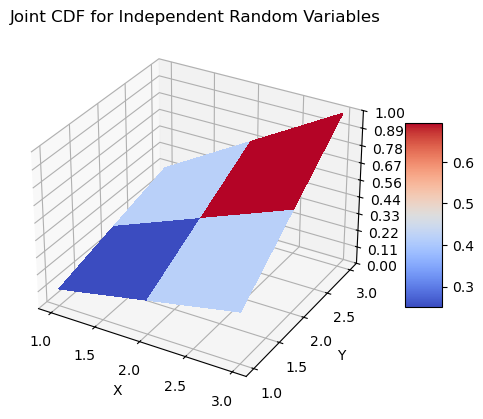

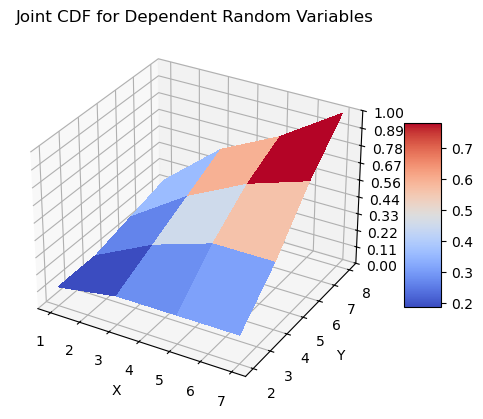

In [11]:
plot_joint_cdf_surface(joint_pmf1, x_values1, y_values1, title='Joint CDF for Independent Random Variables')
plot_joint_cdf_surface(joint_pmf2, x_values2, y_values2, title='Joint CDF for Dependent Random Variables')

## Q3. Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].

In [12]:
expected_xy, expected_x, expected_y = calculate_expections(joint_pmf1, x_values1, y_values1)
print("The value of E[XY] is: ", expected_xy)
print()

# x1_values=np.array(x_values)-expected_x
# y1_values=np.array(y_values)-expected_y
# expected_x1y1=calculate_expected_xy(pmf,x1_values,y1_values)
# print(expected_x1y1)

expected_x1y1=calculate_covariance(joint_pmf1, x_values1, y_values1)
print("The value of E[X1Y1] is: ", expected_x1y1)
print("where X1=X-E[X] and Y1=Y-E[Y]")

The value of E[XY] is:  4.0

The value of E[X1Y1] is:  0.0
where X1=X-E[X] and Y1=Y-E[Y]


# References

1. “Disabling auto-scroll of outputs · Issue #541 · googlecolab/colabtools,” GitHub. https://github.com/googlecolab/colabtools/issues/541#issue-440879358 (accessed Mar. 06, 2024).

2. Lab Discussion Notes provided in Google Classroom. https://colab.research.google.com/drive/1p-VUuStoqca1m8TLFeaDMu6VnJniciSJ?usp=sharing
